In [1]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats

#get_ipython().magic('matplotlib inline')
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

In [2]:
# READ DATASET
df_cab = pd.read_csv('rideshare_kaggle.csv')

In [3]:
df_cab.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df_cab.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [5]:
df_cab.shape

(693071, 57)

In [6]:
# Checking missing data
total_na = df_cab.isnull().sum().sum()
print(f'Total Missing Data: {total_na}')

Total Missing Data: 55095


In [7]:
# DROP THE MISSING DATA
df_clean_cab = df_cab.dropna(axis=0)

In [8]:
df_clean_cab.shape

(637976, 57)

In [9]:
df_clean_cab.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [10]:
# ONLY PICK UBER DATA
df_clean_uber = df_clean_cab[df_clean_cab['cab_type'] == 'Uber']
df_clean_uber = df_clean_uber.reset_index(drop=True)
df_clean_uber.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [11]:
dis_price = df_clean_uber[['distance', 'price']]
display(dis_price)

,distance,price
0,1.11,12.0
1,1.11,16.0
2,1.11,7.5
3,1.11,7.5
4,1.11,26.0
...,...,...
330563,1.00,9.5
330564,1.00,13.0
330565,1.00,9.5
330566,1.00,27.0


In [12]:
# Interaction between distance and price
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
res = pf.fit_transform(dis_price)
res

array([[ 1.11 , 12.   , 13.32 ],
       [ 1.11 , 16.   , 17.76 ],
       [ 1.11 ,  7.5  ,  8.325],
       ...,
       [ 1.   ,  9.5  ,  9.5  ],
       [ 1.   , 27.   , 27.   ],
       [ 1.   , 10.   , 10.   ]])

In [13]:
pd.DataFrame(pf.powers_, columns=['distance', 'price'])

,distance,price
0,1,0
1,0,1
2,1,1


In [14]:
interact_features = pd.DataFrame(res, columns=['Distance','Price','Distance x Price'])
interact_features.head()

,Distance,Price,Distance x Price
0,1.11,12.0,13.320
1,1.11,16.0,17.760
2,1.11,7.5,8.325
3,1.11,7.5,8.325
4,1.11,26.0,28.860


In [15]:
new_df = pd.DataFrame([[0.50, 5.50], [1.00, 10.00], [0.70, 6.50]],
                      columns=['distance', 'price'])
new_df

,distance,price
0,0.5,5.5
1,1.0,10.0
2,0.7,6.5


In [16]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, 
                                 columns=['Distance','Price','Distance x Price'])
new_intr_features

,Distance,Price,Distance x Price
0,0.5,5.5,2.75
1,1.0,10.0,10.00
2,0.7,6.5,4.55


Text(0, 0.5, 'Frequency')

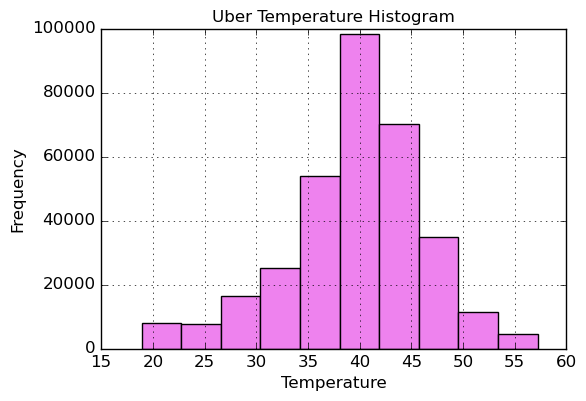

In [23]:
# FIXED-WIDTH BINNING

fig, ax = plt.subplots()
df_clean_uber['temperature'].hist(color='violet')
ax.set_title('Uber Temperature Histogram', fontsize=12)
ax.set_xlabel('Temperature', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [29]:
# Temperature Range: Bin
# ----------------------
#       15  -   24 : 1
#       25  -   34 : 2
#       35  -   44 : 3
#       45  -   54 : 4

bin_ranges = [15, 24, 34, 44, 54]
bin_names = [1, 2, 3, 4]
df_clean_uber['temp_bin'] = pd.cut(np.array(df_clean_uber['temperature']), 
                                               bins=bin_ranges)
df_clean_uber['temp_bin_label'] = pd.cut(np.array(df_clean_uber['temperature']), 
                                               bins=bin_ranges, labels=bin_names)
df_clean_uber[['temperature', 'temp_bin', 
               'temp_bin_label']].iloc[10:15]


,temperature,temp_bin,temp_bin_label
10,39.75,"(34, 44]",3
11,45.35,"(44, 54]",4
12,34.81,"(34, 44]",3
13,39.02,"(34, 44]",3
14,38.95,"(34, 44]",3


In [17]:
# ADAPTIVE BINNING ON UBER PRICE
quantile_list = [0, .25, .5, .75, 1]
quantiles = df_clean_uber['price'].quantile(quantile_list)
quantiles

0.00     4.5
0.25     9.0
0.50    12.5
0.75    21.5
1.00    89.5
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

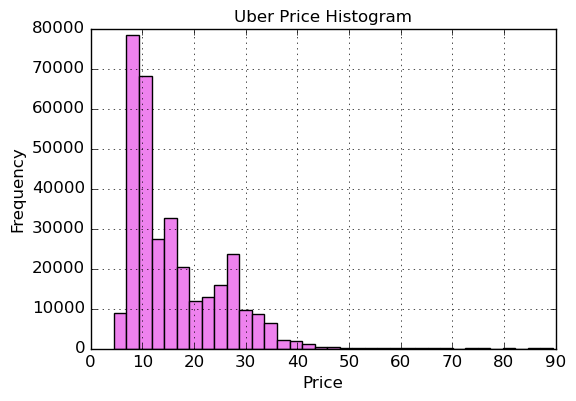

In [18]:
fig, ax = plt.subplots()
df_clean_uber['price'].hist(bins=35, color='violet')
ax.set_title('Uber Price Histogram', fontsize=12)
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

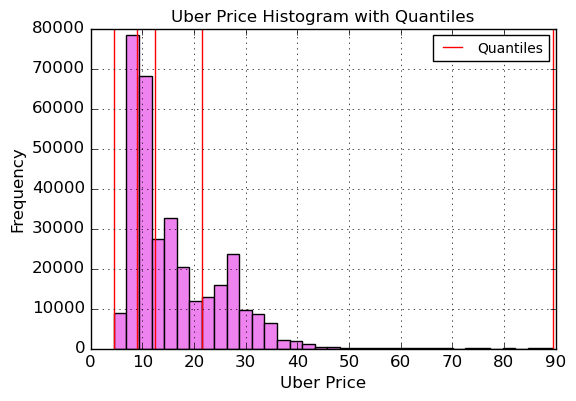

In [19]:
fig, ax = plt.subplots()
df_clean_uber['price'].hist(bins=35, color='violet')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Uber Price Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Uber Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [20]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_clean_uber['price_quantile_range'] = pd.qcut(df_clean_uber['price'], 
                                                 q=quantile_list)
df_clean_uber['price_quantile_label'] = pd.qcut(df_clean_uber['price'], 
                                                 q=quantile_list, labels=quantile_labels)
df_clean_uber.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_quantile_range,price_quantile_label
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600,"(9.0, 12.5]",25-50Q
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,"(12.5, 21.5]",50-75Q
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,"(4.499, 9.0]",0-25Q
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,"(4.499, 9.0]",0-25Q
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,"(21.5, 89.5]",75-100Q


In [21]:
# MATHEMATICAL TRANSFORMATION
# LOG TRANSFORM

df_clean_uber['price_log'] = np.log((1 + df_clean_uber['price']))
df_clean_uber[['price','price_log']].iloc[4:10]

,price,price_log
4,26.0,3.295837
5,5.5,1.871802
6,8.5,2.251292
7,15.0,2.772589
8,20.5,3.068053
9,8.5,2.251292


Text(11.5, 450, '$\\mu$=2.7')

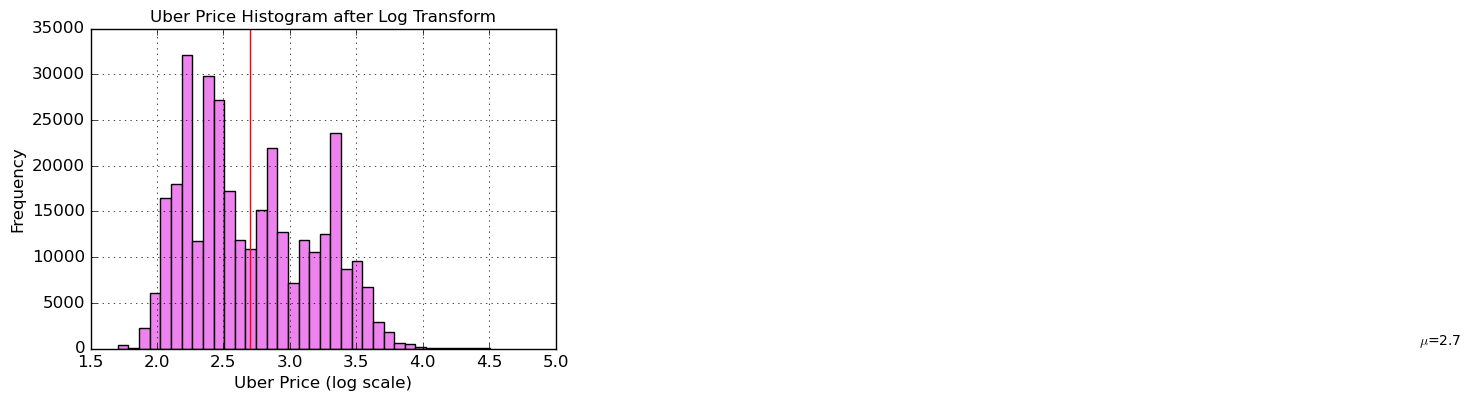

In [22]:
price_log_mean = np.round(np.mean(df_clean_uber['price_log']), 2)

fig, ax = plt.subplots()
df_clean_uber['price_log'].hist(bins=35, color='violet')
plt.axvline(price_log_mean, color='r')
ax.set_title('Uber Price Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Uber Price (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(price_log_mean), fontsize=10)

In [23]:
# BOX - COX TRANSFORM
price = np.array(df_clean_uber['price'])
price_clean = price[~np.isnan(price)]
l, opt_lambda = spstats.boxcox(price_clean)
print('Optimal lambda value: ', opt_lambda)

Optimal lambda value:  -0.39883256999833244


In [24]:
df_clean_uber['price_boxcox_lambda_0'] = spstats.boxcox((1+df_clean_uber['price']), 
                                                         lmbda=0)
df_clean_uber['price_boxcox_lambda_opt'] = spstats.boxcox(df_clean_uber['price'], 
                                                           lmbda=opt_lambda)
df_clean_uber[['price', 'price_log', 'price_boxcox_lambda_0', 'price_boxcox_lambda_opt']].iloc[4:10]

,price,price_log,price_boxcox_lambda_0,price_boxcox_lambda_opt
4,26.0,3.295837,3.295837,1.823608
5,5.5,1.871802,1.871802,1.236952
6,8.5,2.251292,2.251292,1.439427
7,15.0,2.772589,2.772589,1.655894
8,20.5,3.068053,3.068053,1.755627
9,8.5,2.251292,2.251292,1.439427


Text(24, 450, '$\\mu$=1.61')

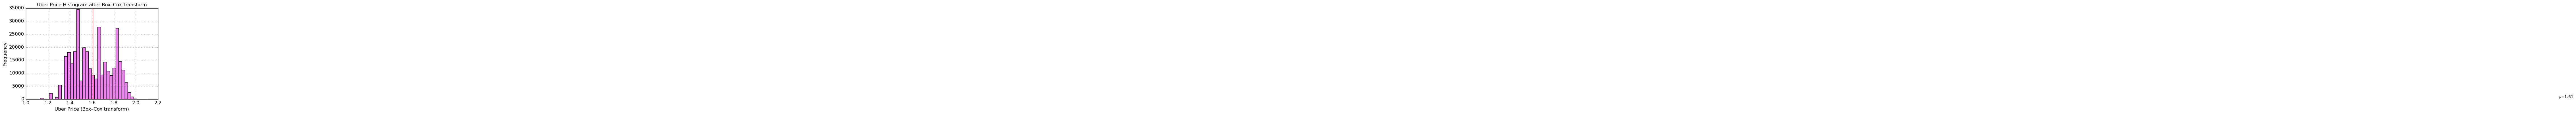

In [25]:
price_boxcox_mean = np.round(np.mean(df_clean_uber['price_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
df_clean_uber['price_boxcox_lambda_opt'].hist(bins=35, color='violet')
plt.axvline(price_boxcox_mean, color='r')
ax.set_title('Uber Price Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Uber Price (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(price_boxcox_mean), fontsize=10)